## Assignment 1
Name : Ayush Agrawal <br>
Roll No: 2020101025

### Task0: Simulate a random walk for n timesteps
Make a function that takes n as an input and runs a 1-D random walk for n timesteps, and returns us the
coordinates of the point at all timesteps. Also plot the graph of position x vs t.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

n = int(input("Enter n: "))

step = ["RIGHT" , "LEFT"]

def random_walk(n):
    positions = [0]
    y=0
    for i in range(1, n+1):
        steptaken = random.choice(step)
        if(steptaken == "RIGHT"):
            y = y+1
        else:
            y = y-1
        positions.append(y)
    return positions

timesteps = np.arange(0, n+1, 1)
positionarr = np.array(random_walk(n), dtype=np.int64)

for i in range(0, n+1):
    print("Timestep: ", timesteps[i], "Position: ", positionarr[i])



Enter n: 10
Timestep:  0 Position:  0
Timestep:  1 Position:  1
Timestep:  2 Position:  0
Timestep:  3 Position:  1
Timestep:  4 Position:  2
Timestep:  5 Position:  3
Timestep:  6 Position:  2
Timestep:  7 Position:  3
Timestep:  8 Position:  4
Timestep:  9 Position:  5
Timestep:  10 Position:  4


### Plot of Position(x) vs Timesteps(t):

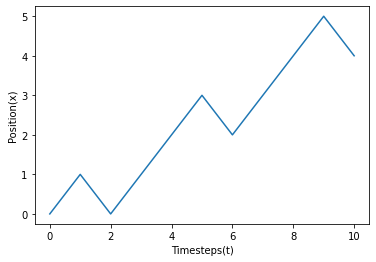

<Figure size 432x288 with 0 Axes>

In [2]:
plt.plot(timesteps, positionarr)
plt.xlabel('Timesteps(t)')
plt.ylabel('Position(x)')
plt.show()
plt.savefig('task0.png')

### Task 1: Simulate a random walk with two people

Two drunks start out together at the origin, each having equal probability of making a step to the left or right
along the X-axis. They make their steps simultaneously. Simulate the experiment appropriate number of times
and answer the following parts:

#### Part 1: Find the Probability that they meet again after N timesteps by running the simulation multiple times and plot the probability for different values of N.

Assumption: The simulation is run for 5000 times for the given input n. A counter 'cnt' keeps track of how many times the positions of the two people were same in all the trials. The probability is then given as cnt/5000.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

n = int(input("Enter n: "))
y1 = 0
y2 = 0
probarr = []
step = ["RIGHT", "LEFT"]

trials = 5000
cnt = 0


for j in range(1, trials+1):
    y1 = 0
    y2 = 0
    for i in range(1, n+1):
        steptaken = random.choice(step)
        if(steptaken == "RIGHT"):
            y1 = y1+1
        else:
            y1 = y1-1

        steptaken = random.choice(step)
        if(steptaken == "RIGHT"):
            y2 = y2+1
        else:
            y2 = y2-1
    if(y1 == y2):
        cnt = cnt + 1

print("Probability of meeting after", n, "steps: ", cnt/trials)

Enter n: 10
Probability of meeting after 10 steps:  0.1742


### Plot
The probability for each value of n is calculated by repeating that walk 20000 times. The plot shows the number of steps vs probability of meeting for n = 0 to 50 steps. The probability decreases exponentially as n increases.

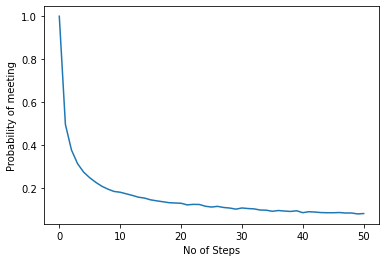

In [4]:
probarr = []
trials = 20000
for nsteps in range(0, 51):
    cnt = 0
    for j in range(1, trials+1):
        y1 = 0
        y2 = 0
        for i in range(1, nsteps+1):
            steptaken = random.choice(step)
            if(steptaken == "RIGHT"):
                y1 = y1+1
            else:
                y1 = y1-1

            steptaken = random.choice(step)
            if(steptaken == "RIGHT"):
                y2 = y2+1
            else:
                y2 = y2-1
        if(y1 == y2):
            cnt = cnt + 1
    probarr.append(cnt/trials)
steps = np.arange(0, 51, 1)

plt.plot(steps, probarr)
plt.xlabel('No of Steps')
plt.ylabel('Probability of meeting')
plt.show()

#### Part2: Simulate the random walk of a single drunk person and find the probability that he/she returns back to the Origin after N timesteps. Plot the probabilities for different values of N.

Assumption: The walk is simulated 5000 times for a given input N. A counter 'cnt' keeps track of how many times the person ended up at origin in all the trials. The probability is then given as cnt/5000

In [5]:
n = int(input("Enter n: "))
y1 = 0
y2 = 0

step = ["RIGHT", "LEFT"]

trials = 5000
cnt = 0

for j in range(1, trials+1):
    y = 0
    for i in range(1, n+1):
        steptaken = random.choice(step)
        if(steptaken == "RIGHT"):
            y = y+1
        else:
            y = y-1
    if(y == 0):
        cnt = cnt + 1

print("Probability of returning back to origin after",n,"steps: ", cnt/trials)

Enter n: 90
Probability of returning back to origin after 90 steps:  0.0834


### Plot

The probability for each value of n is calculated by repeating that walk 5000 times.The plot shows the number of steps vs probability of returning at origin for n = 0 to 50 steps. For even n, The probability decreases exponentially as n increases and for odd n, the probability is always 0. Therefore, the drunkard cannot return to origin after taking an odd number of steps.

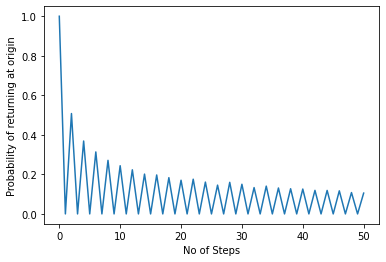

In [6]:
probarr = []
for nsteps in range(0, 51):
    cnt = 0
    for j in range(1, trials+1):
        y = 0
        for i in range(1, nsteps+1):
            steptaken = random.choice(step)
            if(steptaken == "RIGHT"):
                y = y+1
            else:
                y = y-1
        if(y == 0):
            cnt = cnt + 1
    probarr.append(cnt/trials)

steps = np.arange(0, 51, 1)
plt.xlabel('No of Steps')
plt.ylabel('Probability of returning at origin')
plt.plot(steps, probarr)
plt.show()

#### Part 3: Find the Mean and Mean Squared Displacement for the drunk after N steps. Perform the experiment multiple times and find these central tendencies for N time steps.

Assumption: The displacement is calculated 30000 times for the given value of n. Then the mean displacement is the mean of these 30000 values. The mean square displacement is calculated by first squaring each of these 30000 values and then taking the mean of it.

In [7]:
n = int(input("Enter n: "))
y = 0
step = ["RIGHT", "LEFT"]
trials = 30000
finalpos = [0]

for j in range(1, trials+1):
    y=0
    for i in range(1, n+1):
        steptaken = random.choice(step)
        if(steptaken == "RIGHT"):
            y = y+1
        else:
            y = y-1
    finalpos.append(y)

positionarr = np.array(finalpos)
meandisp = np.mean(positionarr)
meansqrdisp = np.mean(np.square(positionarr))
print("Mean Displacement: ",meandisp)
print("Mean Square Displacement: ", meansqrdisp)

Enter n: 100
Mean Displacement:  0.04133195560147995
Mean Square Displacement:  100.74864171194294


### Plot

The plot is generated by repeating the walk 30000 times for each value of N. The mean displacement is the mean of these 30000 values for each N. The mean square displacement is obtained by first squaring these values and then taking mean of it.
- We observe that the mean displacement is close to 0 for all values of N. Therefore, the average displacement of the man is 0.
- We observe that the mean square displacement varies linearly with N. Moreover, it is of the form y = x.

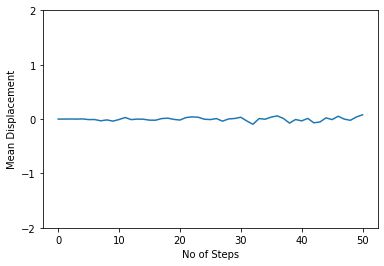

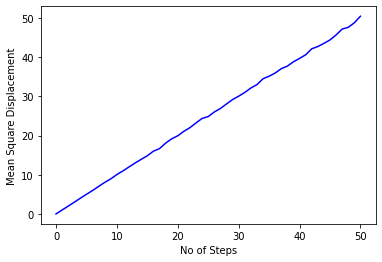

In [8]:
meanpos = []
meansquaredpos = []
trials = 30000
for nsteps in range(0, 51):
    finalpos = []
    for j in range(1, trials+1):
        y=0
        for i in range(1, nsteps+1):
            steptaken = random.choice(step)
            if(steptaken == "RIGHT"):
                y = y+1
            else:
                y = y-1
        finalpos.append(y)
    squaredpos = np.square(finalpos)
    meanpos.append(np.mean(finalpos))
    meansquaredpos.append(np.mean(squaredpos))
    
plt.plot(np.arange(0, 51, 1), meanpos)
plt.yticks(range(-2,3))
plt.xlabel('No of Steps')
plt.ylabel('Mean Displacement')
plt.show()

plt.plot(np.arange(0, 51, 1), meansquaredpos, 'b-')
plt.xlabel('No of Steps')
plt.ylabel('Mean Square Displacement')
plt.show()

## Task 2

Consider a unit circle and unit square as shown in the figure. You have been given N point pebbles. Simulate an experiment to determine the value of π using these inputs. And write a code to find π.

<img src="./montecarlo.png">

Monte-Carlo Simulations are experiments or computational algorithms that rely on sampling of random numbers. An experiment or a simulation of random numbers is repeated a large number of times to estimate something that may be determined deterministically as well (for eg. PI)
### Experiment:
We throw the n pebbles into the unit square area. It may either fall into the area of circle or outside the area of circle. We count the number of pebbles that fell in the area of circle and the total number of pebbles we threw. The probability that the pebble will fall inside the circle is then equal to: 
No of pebbles that fell inside the circle/ total number of pebbles.
Also we know that the probability that the pebble will fall inside the circle: Area of quadrant of circle/ area of square = (πr^2/4)/(1^2) = π/4
Therefore, π = 4 * No of pebbles that fell inside the circle/ total number of pebbles.
According to law of large numbers, the higher the number of pebbles, the more accurate is the calculate value of π.

### Code

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

n = int(input("Enter n: "))
prob = []
circlepos = 0
for j in range(n):
    point = [random.random(), random.random()]
    if(point[0]**2 + point[1]**2 <= 1.00):
        circlepos = circlepos + 1

prob.append(float(circlepos/n))

meanprob = np.mean(prob)
pi = 4*meanprob

print("Value of PI: ", pi)

Enter n: 10000
Value of PI:  3.1316


### Plot

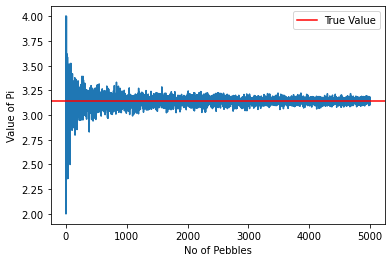

In [10]:
valpi = []

for i in range(1, 5000):
    prob = []
    circlepos = 0
    for k in range(i):
        point = [random.random(), random.random()]
        if(point[0]**2 + point[1]**2 <= 1.00):
            circlepos = circlepos + 1
    prob.append(float(circlepos/i))
    valpi.append(4*np.mean(prob))

plt.plot(np.arange(1, 5000, 1), valpi)
plt.axhline(y = 3.1415926535, color = 'r', linestyle = '-', label="True Value")
plt.xlabel("No of Pebbles")
plt.ylabel("Value of Pi")
plt.legend()
plt.show()